In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2, dt=0.001, Re=1.0)

simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

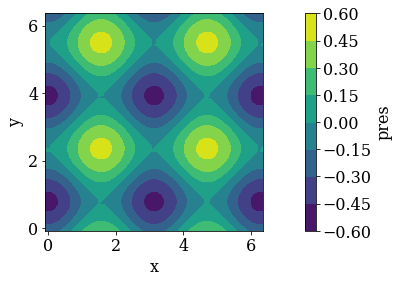

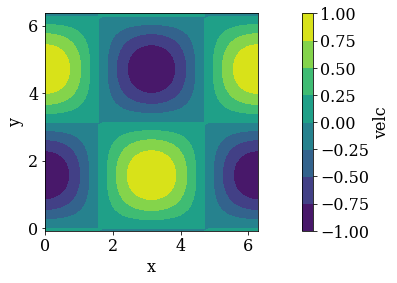

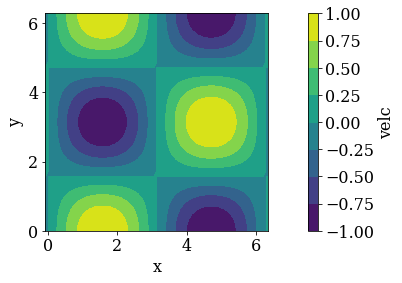

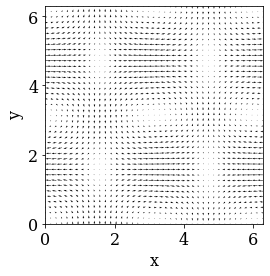

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    for i in range(0,3):
        
        # Update the time-dependent boundary condition value
        simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])

        # Predictor Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor', i=i)

        # Divergence Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence', i=i)

        # Solve the pressure Poisson equation 
        scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                                        poisson_options)
        # Corrector Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector', i=i)

    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.913798962775636e-13
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.9069876258045926, -1.073037407622316
Max, Min, DIV : 2.1649348980190553e-15, -2.3314683517128287e-15


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.759275762940154e-12
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 4.109869177907893, 1.1989201265142384
Max, Min, DIV : 2.3314683517128287e-15, -2.3314683517128287e-15


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.249116843606622e-12
Max, Min, U   : 0.9578276459586815, -0.9578276459586814
Max, Min, V   : 0.9578276459586814, -0.9578276459586815
Max, Min, P   

------------ Time = 0.2600000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.226192673872428e-13
Max, Min, U   : 0.5926878395320042, -0.5926878395320042
Max, Min, V   : 0.5926878395320042, -0.5926878395320042
Max, Min, P   : 0.4649731269782343, -1.2890071287870966
Max, Min, DIV : 1.9984014443252818e-15, -1.8943180357666733e-15


------------ Time = 0.2700000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4542616125161054e-13
Max, Min, U   : 0.5809518339943176, -0.5809518339943175
Max, Min, V   : 0.5809518339943175, -0.5809518339943176
Max, Min, P   : 0.5431446301700968, -1.1759231761514728
Max, Min, DIV : 1.9984014443252818e-15, -1.9567680809018384e-15


------------ Time = 0.2800000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5577587631274447e-12
Max, Min, U   : 0.5694482169363564, -0.5694482169363564
Max, Min, V   : 0.5694482169363564, -0.569448216936

------------ Time = 0.5100000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.766794743099248e-13
Max, Min, U   : 0.3594833463150018, -0.35948334631500173
Max, Min, V   : 0.35948334631500173, -0.3594833463150018
Max, Min, P   : 0.9438794314813261, -0.11818861360142964
Max, Min, DIV : 1.0824674490095276e-15, -9.992007221626409e-16


------------ Time = 0.5200000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7984960443065837e-13
Max, Min, U   : 0.3523650991338376, -0.35236509913383757
Max, Min, V   : 0.35236509913383757, -0.3523650991338376
Max, Min, P   : 0.19865532835459254, -0.8423860971944149
Max, Min, DIV : 1.0824674490095276e-15, -1.061650767297806e-15


------------ Time = 0.5300000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8009199744084635e-13
Max, Min, U   : 0.34538780269059094, -0.3453878026905909
Max, Min, V   : 0.3453878026905909, -0.3453878

------------ Time = 0.7500000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.20638321433048e-13
Max, Min, U   : 0.22252011941551372, -0.22252011941551367
Max, Min, V   : 0.22252011941551367, -0.2225201194155137
Max, Min, P   : 0.14319399588351295, -0.5140866551972759
Max, Min, DIV : 5.828670879282072e-16, -7.91033905045424e-16


------------ Time = 0.7600000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.170305822920266e-12
Max, Min, U   : 0.2181201204056743, -0.21812012040567422
Max, Min, V   : 0.21812012040567422, -0.21812012040567427
Max, Min, P   : -0.7830644800621224, -1.4273350082199292
Max, Min, DIV : 5.828670879282072e-16, -6.661338147750939e-16


------------ Time = 0.7700000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2790634497100534e-13
Max, Min, U   : 0.21380715260504757, -0.21380715260504754
Max, Min, V   : 0.21380715260504754, -0.21380715

------------ Time = 1.0000000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.464452326075511e-14
Max, Min, U   : 0.13506723908729798, -0.13506723908729795
Max, Min, V   : 0.13506723908729792, -0.13506723908729795
Max, Min, P   : 0.20755567769069763, -0.1911944982377386
Max, Min, DIV : 4.475586568020162e-16, -4.475586568020162e-16


------------ Time = 1.0099999999999996 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.979500575259012e-13
Max, Min, U   : 0.13239702183720806, -0.13239702183720806
Max, Min, V   : 0.13239702183720803, -0.13239702183720803
Max, Min, P   : -0.07349401306098702, -0.46435243750573185
Max, Min, DIV : 4.475586568020162e-16, -4.371503159461554e-16


------------ Time = 1.0199999999999985 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5678230178397613e-13
Max, Min, U   : 0.12977961831892346, -0.12977961831892343
Max, Min, V   : 0.12977961831892343, -0.12

------------ Time = 1.2499999999999731 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.234688499906926e-14
Max, Min, U   : 0.08199394085452308, -0.08199394085452306
Max, Min, V   : 0.08199394085452308, -0.08199394085452309
Max, Min, P   : 0.07537348429680885, -0.16655020351129737
Max, Min, DIV : 2.706168622523819e-16, -2.393918396847994e-16


------------ Time = 1.259999999999972 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1202066911476294e-13
Max, Min, U   : 0.08037339060513725, -0.08037339060513723
Max, Min, V   : 0.08037339060513725, -0.08037339060513725
Max, Min, P   : -0.07620893049827095, -0.3133452360509203
Max, Min, DIV : 2.498001805406602e-16, -2.6020852139652106e-16


------------ Time = 1.269999999999971 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4334022241168677e-13
Max, Min, U   : 0.07878488833587209, -0.07878488833587208
Max, Min, V   : 0.07878488833587206, -0.07

------------ Time = 1.5199999999999434 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.112997044970832e-13
Max, Min, U   : 0.047834953220689314, -0.047834953220689314
Max, Min, V   : 0.04783495322068932, -0.04783495322068931
Max, Min, P   : 0.1766130666521587, 0.035578755585774696
Max, Min, DIV : 1.3010426069826053e-16, -1.3530843112619095e-16


------------ Time = 1.5299999999999423 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1166152410159676e-13
Max, Min, U   : 0.04688986885865825, -0.046889868858658236
Max, Min, V   : 0.04688986885865824, -0.046889868858658236
Max, Min, P   : 0.17392480095793564, 0.03568099930763862
Max, Min, DIV : 1.3530843112619095e-16, -1.249000902703301e-16


------------ Time = 1.5399999999999412 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.0359709961040174e-14
Max, Min, U   : 0.04596347033909162, -0.045963470339091615
Max, Min, V   : 0.04596347033909162

------------ Time = 1.7799999999999148 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.203916820966258e-14
Max, Min, U   : 0.02847508259939096, -0.028475082599390963
Max, Min, V   : 0.02847508259939096, -0.02847508259939096
Max, Min, P   : 0.07980675588461213, -0.004078255142606009
Max, Min, DIV : 8.326672684688674e-17, -6.765421556309548e-17


------------ Time = 1.7899999999999137 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6375720475087526e-14
Max, Min, U   : 0.02791273050258627, -0.027912730502586275
Max, Min, V   : 0.027912730502586275, -0.02791273050258627
Max, Min, P   : 0.05042756215801304, -0.03179795431793224
Max, Min, DIV : 8.326672684688674e-17, -6.765421556309548e-17


------------ Time = 1.7999999999999126 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.591265912181423e-14
Max, Min, U   : 0.027361494001786814, -0.027361494001786814
Max, Min, V   : 0.027361494001786814

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

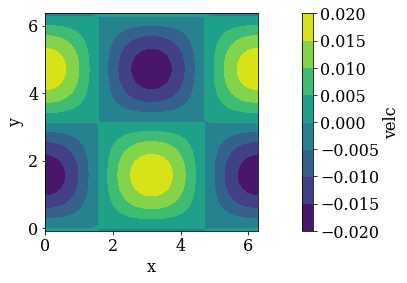

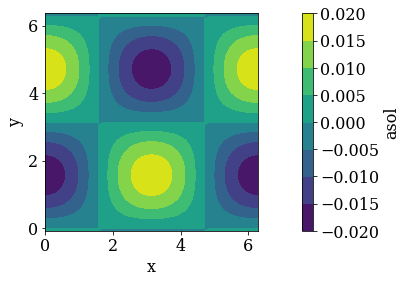

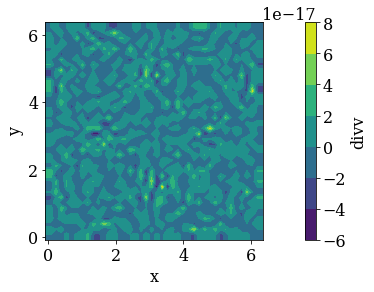

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

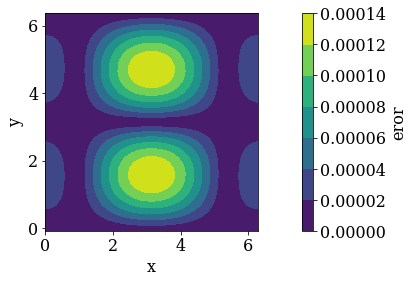

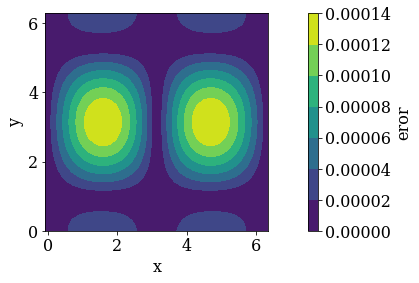

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')